# Математические пакеты. Лабораторная работа 1: Основы ЦОС

Выполнил студент группы 9381 Аухадиев Александр.

## Цель работы

Изучить возможности библиотек Python для решения цифровых задач обработки сигналов.

## Задачи 

1. Освоить Jupyter Notebook.
2. Выполнить загрузку аудио сигнала и построить огибающую (график).
3. Фильтрация (выбрать один из 4 типов фильтров). Получить фильтрованный сигнал.
4. Детектор сигнал/шум. Получить сигнал после детектирования.
5. Эффект "Эхо". Получить сигнал после работы аудио-эффекта.
6. **Бонусное задание:** эффект Distortion (классический вариант). Получить сигнал после работы аудио-эффекта.

## Теоретические положения

### Фильтрация  

Имеется сигнал $x(i),i=0,1,...,N-1$. Хотим построить огибающую $y(j),j=0,1,...,n-1$.  
Пусть $m=[{N\over n}]$ - число точек в интервале усреднения (порядок фильтра). Тогда  $y(j)={1\over m}\sum\limits_{k=mj}^{mj+m-1}|x(k)|$.  
Основные типы фильтров: нижних частот (ФНЧ), верхних частот (ФВЧ), полосовой (ПФ), режекторный (РФ).  
  
**Фильтр нижних частот (ФНЧ)** — эффективно пропускает частотный спектр сигнала ниже некоторой частоты (частоты среза) и подавляет частоты сигнала выше этой частоты. От нулевой частоты до частоты среза ФНЧ находится полоса частот пропускания, справа - полоса частот подавления.  
**Фильтр верхних частот (ФВЧ)** - пропускает высокие частоты входного сигнала, при этом подавляя частоты сигнала ниже частоты среза.  
**Полосовой фильтр (ПФ)** - пропускает составляющие, находящиеся в некоторой полосе частот.  
**Режекторный фильтр (РФ)** - не пропускающий колебания некоторой определённой полосы частот и пропускающий колебания с частотами, выходящими за пределы этой полосы.  
  
### Пример ФНЧ фильтрации

Пусть $F_d$ - частота дискретизации, $F_s$ - частота среза, $m$ - порядок фильтра. Тогда вычисляем: $wn=2{F_s\over F_d}$, где $wn$ - относительная частота среза.  

### Амплитудный детектор сигнал/шум

Определяем среднее сигнала по амплитуде (без учёта знака): $mid={{\sum\limits_{k=0}^{N-1}{|x(k)|}}\over N}$  
Определяем порог детектора - $Th=\alpha * mid$, где $0<\alpha<1$ подбирается экспериментально. Задаём величину "провала" (в отсчётах) - $k$. Обозначим $y(i)$ - сигнал после детектирования.  

**Событие "начало сигнала"**. Если $x(i)$ в течение $k$ отсчётов превышает порог, $y(i)=x(i)$,  
**Событие "окончание сигнала"**. Если $x(i)$ в течение $k$ отсчётов меньше порога, $y(i)=0$

### Эхо (простейший ревербератор)

Ревербератор реализован, как набор линий задержки. Число линий задержки $N_L>8$. Каждая линия задержки имеет свой весовой коэффициент (задается пользователем): $\alpha_1 > \alpha_2 > ... > \alpha_{N_L}$  
Перед добавлением к исходному сигналу, выход ревербератора фильтруется ФНЧ-фильтром первого порядка.  
Желаемое соотношение между ”сухим”и обработанным сигналом задается коэффициентом применимости $\gamma$. 
  
Ревербератор может работать в двух режимах: ручной и с использованием готовой конфигурации (preset). Для ручного режима регулируется пользователем задается максимальная задержка $D_1$, а величины остальных определяются автоматически через нее:  
$D_i = D_{1}2{{1-i}\over N_L}, i=2,...,N_L$.  
Для готовой конфигурации пользователь вручную задает последовательность $D_1 > D_2 > ... > D_{N_L}$.  
  
Начальное значение $D_1$ определяется геометрией помещения, и является расстоянием, пройденным звуком (скорость 335 м/сек) от точки излучения до ближайшего препятствия.  
  
Пример: Допустим, частота дискретизации сигнала 48000 Гц, до ближайшей стены — 10 метров. Звук пройдет это расстояние за ${10\over 335} =$ 0.02985 секунд. Тогда задержка $D_1$ составит 48000 ∗ 0.02985 = 1433 отсчета сигнала.  
  
### Классический Distortion
  
Обозначим входной сигнал и выходной сигналы, соответственно как $x(i)$ и $y(i), i = 0,1, . . . ,N − 1$. Пользователь задает порог— $Th$ и максимальное значение сигнала $Max > Th$. Тогда  
\begin{equation*}
Y(i) = 
 \begin{cases}
   x(i) &\text{$|x(i)|\leq Th$}\\
   Max * sign(x(i)) &\text{$|x(i)|>Th$}
 \end{cases}
\end{equation*}  
  
## Выполнение работы
  
### Загрузка аудио сигнала и построение огибающей  
  


In [34]:
#Импорт необходимых пакетов, считывание и проигрывание аудио-файла

from scipy import signal
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
import wave
import math

audio_file = '03-01-05-01-01-01-03_A3.wav'
ipd.Audio(audio_file)

In [36]:
wav_read = wave.open(audio_file, mode="r") #Объект для чтения wav-файла
# Считываем число каналов, число байт на сэмпл, частота дискретизации, общее число фреймов, тип сжатия, имя типа сжатия
(nchannels, sampwidth, framerate, nframes, comptype, compname) = wav_read.getparams() 
content = wav_read.readframes(nframes) # считывание фреймов

#сопоставлены размеры сэмпла и типы данных numpy
types = {
    1: np.int8,
    2: np.int16,
    4: np.int32
}
# Параметр sampwidth определяет, сколько байт уходит на кодирование одного сэмпла
content = np.fromstring(content, dtype=types[sampwidth]) #создает одномерный массив из байтовой строки

time = nframes / framerate #Длительность потока в секундах
time_array = np.linspace(0, len(content) / framerate, num=len(content)) #равномерное распределение фрэймов по времени

C:\Users\8523~1\AppData\Local\Temp/ipykernel_7652/1267821781.py:13: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  content = np.fromstring(content, dtype=types[sampwidth]) #создает одномерный массив из байтовой строки


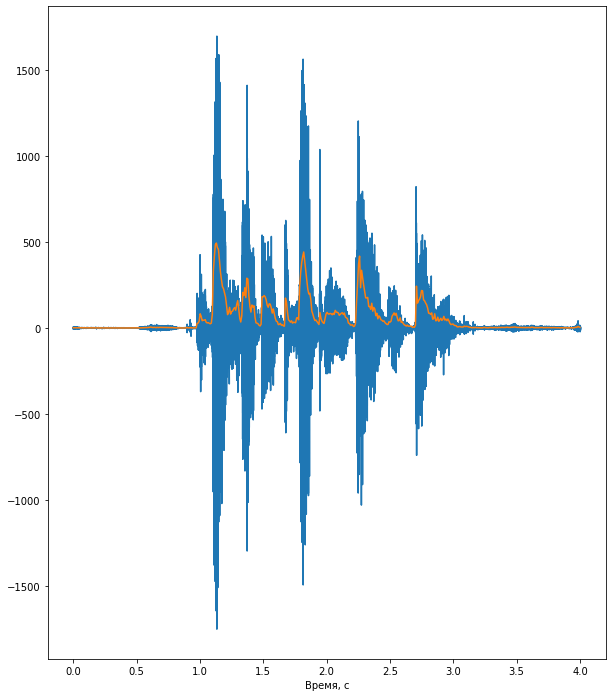

In [37]:
N = len(content) 
n = 500
m = math.floor(N/n) #Количество точек усреднения

envelope = [] #огибающая
for j in range(n):
    summ = 0
    for k in range(m*j, m*j+m-1):
        summ += abs(content[k])
    envelope.append(summ/m)
    
plt.figure(figsize=(10, 12))    
plt.xlabel("Время, с")
plt.plot(time_array, content)
distributed_content = np.linspace(0, 4, num=len(envelope))
plt.plot(distributed_content, envelope)


### Фильтрация

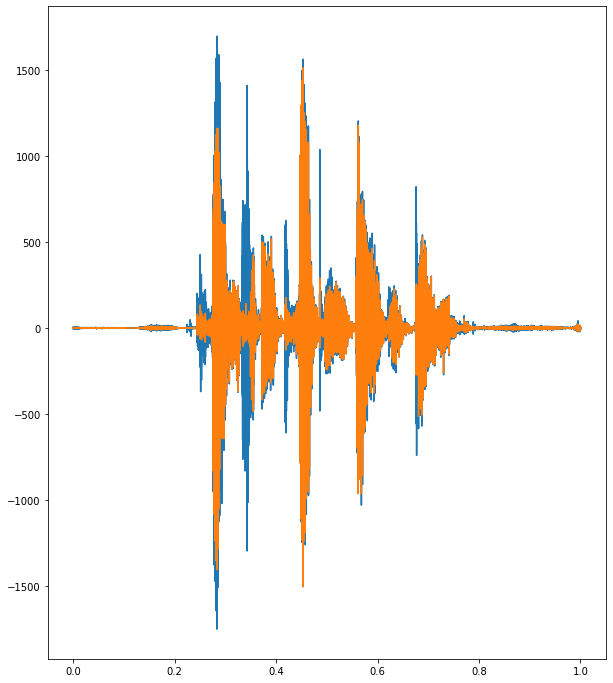

In [38]:
Fs = 2000 #Частота среза
m = 5 #Порядок фильтрации
wn = 2 * (Fs / framerate) 
b, a = signal.butter(5, wn, "lowpass") #b - вектор коэффициентов числителя фильтра, a - вектор коэффициентов знаменателя фильтра
filted_content = signal.filtfilt(b, a, content) #filtedContent - отфильтрованный сигнал
arr = np.linspace(0,1,len(content))
plt.figure(figsize=(10, 12))
plt.plot(arr, content)
plt.plot(arr, filted_content)
write_content = np.asarray(filted_content, dtype=types[sampwidth])
wavfile.write("result_filt.wav", framerate, write_content)
ipd.Audio("result_filt.wav")

### Детектор сигнал/шум

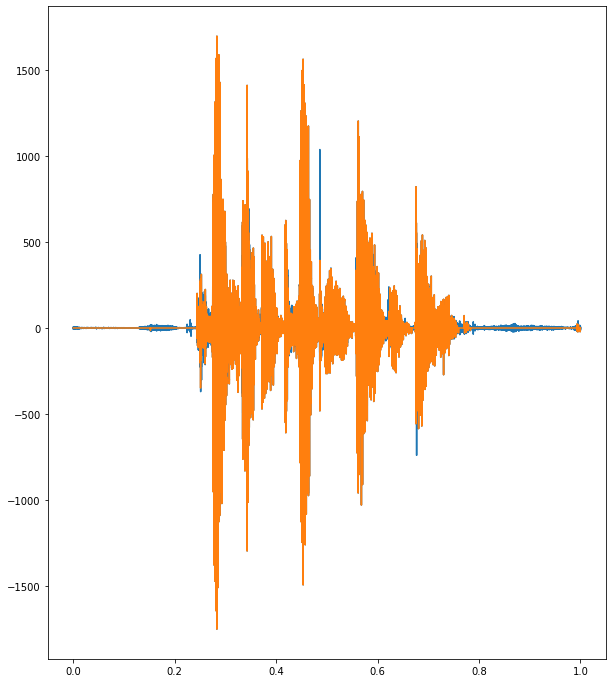

In [40]:
N = len(content)
summ = 0
for k in range(N):
    summ += abs(content[k])
    
mid = summ/N #среднее сигнала по амплитуде
alpha = 0.2
Th = alpha * mid #порог детектора
k = 10 #Величина провала (в отсчётах)

n_signal = 0
n_no_signal = 0
y = [0]*N
for i in range(N):
    if abs(content[i]) > Th:
        n_signal += 1
        n_no_signal = 0
        if n_signal >= k:
            y[i] = content[i]
    else:
        n_no_signal += 1
        n_signal = 0
arr = np.linspace(0,1,len(content))
plt.figure(figsize=(10, 12))
plt.plot(arr, content)
plt.plot(arr, y)
y = np.asarray(y, dtype=types[sampwidth])
wavfile.write("result_detect.wav", framerate, y)        
ipd.Audio("result_detect.wav")             

### Эхо (простейший ревербератор)

In [ ]:
N = len(content)
NL = 9 #Число линий задержки
D = [0]*NL #Линии задержки
gamma = 0.95 #коэффициент применимости
v = 335 #м/с - скорость звука
distance = float(input("Введите расстояние до ближайшей стены: "))/v #Расстояние до ближайшей стены
D[0] = distance
alpha = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1] #Весовые коэффициенты линий задержки

for i in range(1, NL):
    D[i] = D[0] * (2 ** ((-i)/NL))

process_content = [0]*(int((np.sum(D) + N / framerate + 1) * framerate))
for i in range(N-1):
    n = 0
    for j in range(NL):
        n+=D[j]   
        process_content[i+int(n*framerate)] += content[i] * alpha[j]   

# Применение к полученному сигналу ФНЧ        
Fs = 1000
wn = 2 * Fs / framerate
m = 5
b, a = signal.butter(m, wn, "lowpass")
echo_content = signal.filtfilt(b, a, process_content)*gamma

for i in range(N):
    echo_content[i]+=content[i]
    
echo_content = np.asarray(echo_content, dtype=types[sampwidth])    
wavfile.write("result_echo.wav", framerate, echo_content)
ipd.Audio("result_echo.wav")

Введите расстояние до ближайшей стены: 15


### Классический Distortion

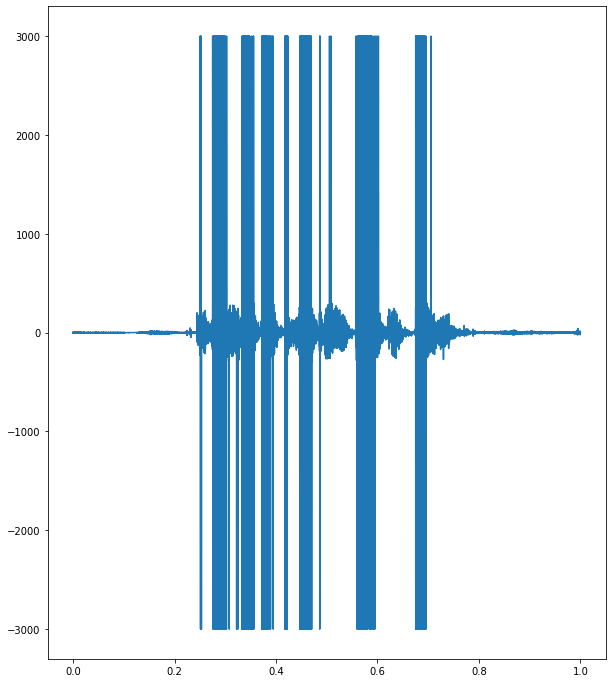

In [33]:
Th = 300 #порог
Max = 3000 #Максимальное значение сигнала
Y = [0]*N #Выходной сигнал
for i in range(N):
    if (abs(content[i]) < Th):
        Y[i] = content[i]
    else:
        Y[i] = Max * np.sign(content[i])
        
arr = np.linspace(0,1,N)
plt.figure(figsize=(10, 12))
plt.plot(arr, Y)

Y = np.asarray(Y, dtype=types[sampwidth])
wavfile.write("result_distortion.wav", framerate, Y)        
ipd.Audio("result_distortion.wav")

### Выводы
Были изучены возможности библиотек Python (scipy, IPython.display, wave) для решения цифровых задач обработки сигналов, а именно для фильтрации, детектирования сигнал/шум, наложения эффекта "Эхо", наложения эффекта классического Distortion. Также были изучены возможности считывания и записи .wav-файлов и визуализации сигналов.